In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
force_files = glob.glob('**/*forceCoeffs.dat', recursive=True)

In [3]:
#for file in force_files:
#    print(file)

In [4]:
df = pd.DataFrame()
for f in force_files:
    aoa = int(f.split('/')[0].replace('AoA_',''))
    # Read the header first (line starting with "#")
    with open(f) as fh:
        header = None
        for line in fh:
            if line.startswith("# Time"):
                header = line.lstrip("#").strip().split()
                break
    
    if header is None:
        continue  # skip if no header found

    # Load data into dataframe
    data = pd.read_csv(f, comment="#", delim_whitespace=True, names=header)
    data['aoa'] = aoa
    df = pd.concat([df, data], axis=0)

/tmp/ipykernel_35804/2045374874.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(f, comment="#", delim_whitespace=True, names=header)
/tmp/ipykernel_35804/2045374874.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(f, comment="#", delim_whitespace=True, names=header)
/tmp/ipykernel_35804/2045374874.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(f, comment="#", delim_whitespace=True, names=header)
/tmp/ipykernel_35804/2045374874.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(f, comment="#", delim_whitespace=

In [5]:
df2 = df[df.Time==500].sort_values(by='aoa').reset_index(drop=True)

In [6]:
df2

,Time,Cm,Cd,Cl,Cl(f),Cl(r),aoa
0,500,0.306155,0.977885,-0.857838,-0.122763,-0.735074,-50
1,500,0.230692,0.724501,-0.851475,-0.195046,-0.656429,-40
2,500,0.175865,0.496015,-0.815190,-0.231730,-0.583460,-30
3,500,0.135049,0.297388,-0.750680,-0.240291,-0.510389,-20
4,500,0.087981,0.110589,-0.562416,-0.193227,-0.369189,-10
5,500,0.062284,0.076933,-0.438569,-0.157000,-0.281569,-8
6,500,0.039825,0.051014,-0.321193,-0.120771,-0.200422,-6
7,500,0.023043,0.034541,-0.194740,-0.074327,-0.120414,-4
8,500,-0.000221,0.024222,-0.055325,-0.027883,-0.027442,-2
9,500,-0.017878,0.020591,0.074875,0.019560,0.055315,0


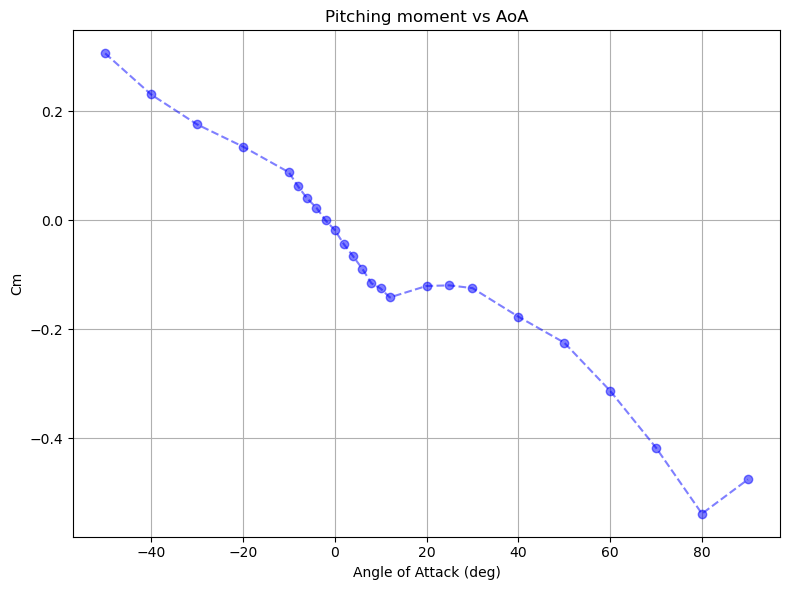

In [7]:
fig, ax1 = plt.subplots(figsize=(8,6))

# --- Primary y-axis: Cl, Cd ---
ax1.plot(df2["aoa"], df2["Cm"], 'o--', color='blue', alpha=0.5, label="Cm")

ax1.set_xlabel("Angle of Attack (deg)")
ax1.set_ylabel("Cm", color='black')
ax1.grid(True)

# Optional: combine legends from both axes
#lines1, labels1 = ax1.get_legend_handles_labels()

# --- Secondary y-axis: Cl/Cd ---
#ax2 = ax1.twinx()
#ax2.plot(df2["aoa"], df2["Cl"] / df2["Cd"], 's--', color='red', alpha=0.7, label="Cl / Cd")
#ax2.set_ylabel("Cl / Cd", color='red')

# Combine legends
#lines2, labels2 = ax2.get_legend_handles_labels()
#ax1.legend(lines1 + lines2, labels1 + labels2, loc="best")

plt.title("Pitching moment vs AoA")
plt.tight_layout()
plt.show()


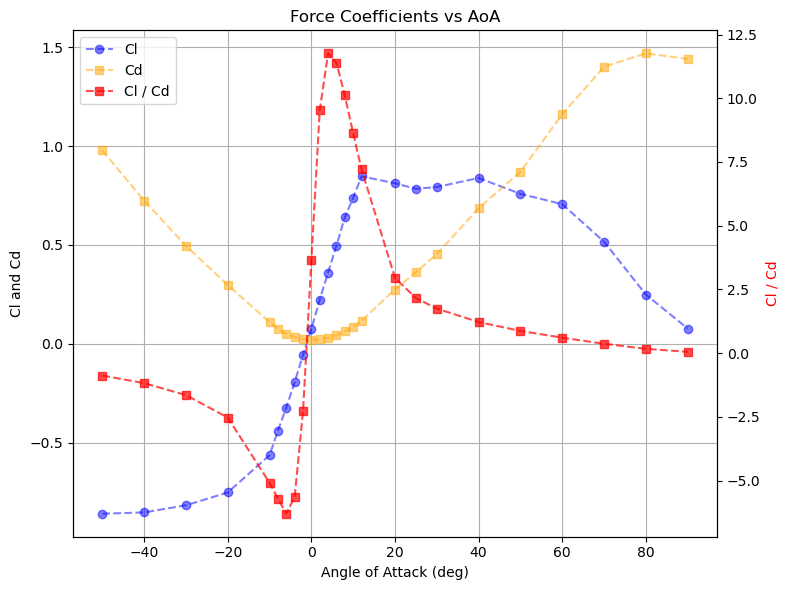

In [8]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8,6))

# --- Primary y-axis: Cl, Cd ---
ax1.plot(df2["aoa"], df2["Cl"], 'o--', color='blue', alpha=0.5, label="Cl")
ax1.plot(df2["aoa"], df2["Cd"], 's--', color='orange', alpha=0.5, label="Cd")
#ax1.plot(df2["aoa"], df2["Cm_last"], '^--', color='green', alpha=0.5, label="Cm (last)")

ax1.set_xlabel("Angle of Attack (deg)")
ax1.set_ylabel("Cl and Cd", color='black')  # main axis label
ax1.grid(True)

# Optional: combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()

# --- Secondary y-axis: Cl/Cd ---
ax2 = ax1.twinx()
ax2.plot(df2["aoa"], df2["Cl"] / df2["Cd"], 's--', color='red', alpha=0.7, label="Cl / Cd")
ax2.set_ylabel("Cl / Cd", color='red')

# Combine legends
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="best")

plt.title("Force Coefficients vs AoA")
plt.tight_layout()
plt.show()
